In [19]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings


from datetime import datetime


# Ignorar todos os alertas
warnings.filterwarnings("ignore")
sns.set_palette("deep")

In [20]:
df = []

for i in [2018, 2019, 2020, 2021, 2022, 2023]:

    f = pd.read_csv(fr'data/focos_br_todos-sats_{i}.csv', sep=',')
    
    df.append(f)
    
df = pd.concat(df)

df['focos'] = df['latitude'].map(str) + "," + df['longitude'].map(str)

df['data_pas'] = pd.to_datetime(df['data_pas']).dt.date


In [21]:
df = df.sort_values('data_pas')

In [30]:
df['data_pas'] = pd.to_datetime(df['data_pas'].astype(str).apply(lambda x: x[:11]))

df['senama'] = df['data_pas'] - pd.to_timedelta(df['data_pas'].dt.weekday, unit='d')

# df['data_pas'] = pd.to_datetime(df['data_pas']).dt.date
# df.set_index('data_pas', inplace=True)

<Axes: xlabel='senama'>

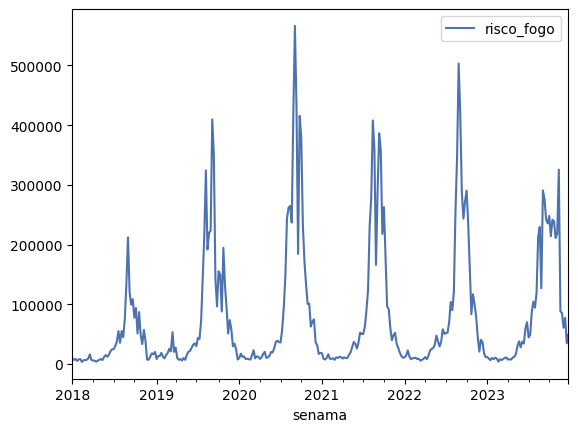

In [32]:
pd.pivot_table(df,
               index = 'senama',
               values = 'risco_fogo',
               aggfunc = len).plot()

In [40]:
df['value'] = 1

In [41]:
df['value'] = 1
dfi = pd.pivot_table(df,
               index = 'senama',
               values = 'value',
               aggfunc = len)

dfi

,value
senama,
2018-01-01,8918
2018-01-08,6850
2018-01-15,8484
2018-01-22,5128
2018-01-29,7629
...,...
2023-11-27,85183
2023-12-04,60748
2023-12-11,77283


MSE: 2826357598.797191


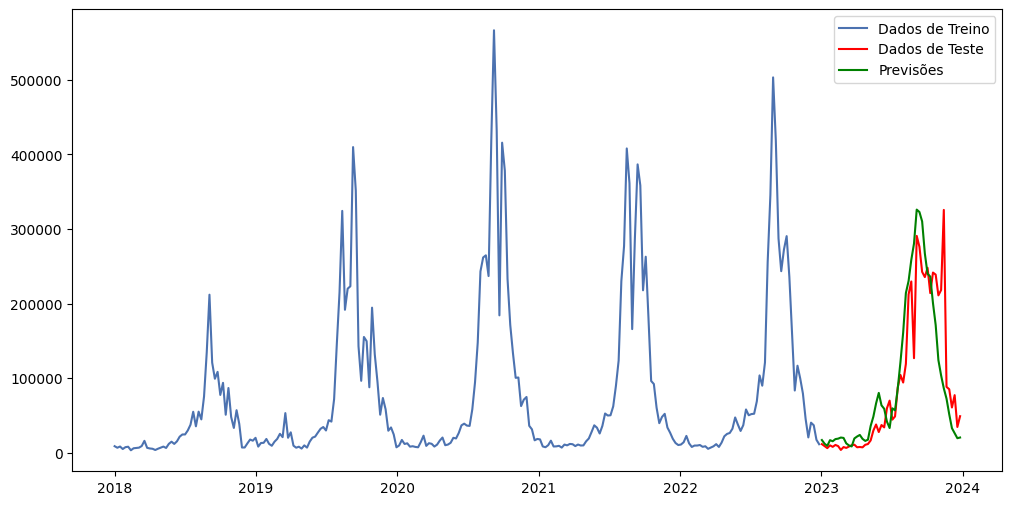

In [43]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


y = dfi['value'] 

train_size = int(len(y) * 0.85)
train = y[y.index.astype(str)<'2023-01-01']
test = y[y.index.astype(str) >='2023-01-01']


p = 52  
d = 2  
q = 1 

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

mse = mean_squared_error(test, forecast)
print(f"MSE: {mse}")

# Visualização das previsões
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Dados de Treino')
plt.plot(test.index, test, label='Dados de Teste', color='red')
plt.plot(test.index, forecast, label='Previsões', color='green')
plt.legend()
plt.show()


